# copy Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Irma Dwiyanti
- **Email:** mc222d5x1689@student.devacademy.id
- **ID Dicoding:** MC222D5X1689

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dibeli?
- Metode pembayaran mana yang paling sering digunakan pelanggan?


## Import Semua Packages/Library yang Digunakan

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [161]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
dataset_path = "/content/drive/MyDrive/E-Commerce Public Dataset/"

In [163]:
print("Isi Folder Dataset:")
print(os.listdir(dataset_path))

Isi Folder Dataset:
['New Text Document.txt', 'geolocation_dataset.csv', 'customers_dataset.csv', 'order_payments_dataset.csv', 'order_reviews_dataset.csv', 'orders_dataset.csv', 'order_items_dataset.csv', 'sellers_dataset.csv', 'products_dataset.csv', 'product_category_name_translation.csv']


## Data Wrangling

### Gathering Data

In [164]:
#ORDER_ITEMS
order_items_df = pd.read_csv(dataset_path + "order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [165]:
#PRODUCT
products_df = pd.read_csv(dataset_path + "products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [166]:
#ORDER_PAYMENTS
order_payments_df = pd.read_csv(dataset_path + "order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [167]:
#CUSTOMERS
customers_df = pd.read_csv(dataset_path + "customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Data sudah berhasil dimuat, dan data bisa dilihat dengan informasi dasar seperti order_id, product_id, customers_id dan status pesanan.
- Data yang dibutuhkan mencakup pesanan, produk, pembayaran, dan informasi pelanggan.

### Assessing Data

In [168]:
#ORDER_ITEMS
print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [169]:
#PRODUCT
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [170]:
#ORDER_PAYMENTS
print(order_payments_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [171]:
#CUCTOMERS
print(customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Mengecek missing values di setiap kolom

In [172]:
print('order_items: \n')
print(order_items_df.isnull().sum())
print('\n')

print('products: \n')
print(products_df.isnull().sum())
print('\n')

print('order_payments: \n')
print(order_payments_df.isnull().sum())
print('\n')

print('customers: \n')
print(customers_df.isnull().sum())

order_items: 

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


products: 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


order_payments: 

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


customers: 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Mengecek data duplikasi

In [173]:
# Mengecek data duplikasi
print('order_items: ', order_items_df.duplicated().sum())
print('products: ', products_df.duplicated().sum())
print('order_payments: ', order_payments_df.duplicated().sum())
print('customers: ', customers_df.duplicated().sum())

order_items:  0
products:  0
order_payments:  0
customers:  0


Describe masing masing data

In [174]:
#ORDER_ITEM
print("Deskripsi order_items:")
order_items_df.describe()

Deskripsi order_items:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [175]:
#PRODUCTS
print("Deskripsi products:")
products_df.describe()

Deskripsi products:


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [176]:
#ORDER_PAYMENTS
print("Deskripsi order_payments:")
order_payments_df.describe()

Deskripsi order_payments:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [177]:
#CUSTOMERS
print("Deskripsi customers:")
customers_df.describe()

Deskripsi customers:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [178]:
# Menentukan batas outlier untuk price
Q1_price = order_items_df['price'].quantile(0.25)
Q3_price = order_items_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Menentukan batas outlier untuk freight_value
Q1_freight = order_items_df['freight_value'].quantile(0.25)
Q3_freight = order_items_df['freight_value'].quantile(0.75)
IQR_freight = Q3_freight - Q1_freight
lower_bound_freight = Q1_freight - 1.5 * IQR_freight
upper_bound_freight = Q3_freight + 1.5 * IQR_freight

# Menampilkan outlier yang ditemukan
outliers_price = order_items_df[(order_items_df['price'] < lower_bound_price) | (order_items_df['price'] > upper_bound_price)]
outliers_freight = order_items_df[(order_items_df['freight_value'] < lower_bound_freight) | (order_items_df['freight_value'] > upper_bound_freight)]

print(f"Jumlah outlier pada price: {len(outliers_price)}")
print(f"Jumlah outlier pada freight_value: {len(outliers_freight)}")

Jumlah outlier pada price: 8427
Jumlah outlier pada freight_value: 12134


In [179]:
# Cek produk dengan harga tertinggi
print(order_items_df[['product_id', 'price']].sort_values(by='price', ascending=False).head(10))

# Cek produk dengan harga terendah
print(order_items_df[['product_id', 'price']].sort_values(by='price', ascending=True).head(10))


                              product_id    price
3556    489ae2aa008f021502940f251d4cce7f  6735.00
112233  69c590f7ffc7bf8db97190b6cb6ed62e  6729.00
107841  1bdf5e6731585cf01aa8169c7028d6ad  6499.00
74336   a6492cc69376c469ab6f61d8f44de961  4799.00
11249   c3ed642d592594bb648ff4a04cee2747  4690.00
62086   259037a6a41845e455183f89c5035f18  4590.00
29193   a1beef8f3992dbd4cd8726796aa69c53  4399.87
45843   6cdf8fc1d741c76586d8b6b15e9eef30  4099.99
78310   dd113cb02b2af9c8e5787e8f1f0722f6  4059.00
59137   6902c1962dd19d540807d0ab8fade5c6  3999.90
                             product_id  price
27652  8a3254bee785a526d548a81a9bc3c9be   0.85
87081  8a3254bee785a526d548a81a9bc3c9be   0.85
48625  8a3254bee785a526d548a81a9bc3c9be   0.85
57297  270516a3f41dc035aa87d220228f844c   1.20
57302  05b515fdc76e888aada3c6d66c201dff   1.20
57303  05b515fdc76e888aada3c6d66c201dff   1.20
57304  05b515fdc76e888aada3c6d66c201dff   1.20
57305  05b515fdc76e888aada3c6d66c201dff   1.20
57306  05b515fdc76e888aada3

In [180]:
# Cek biaya pengiriman tertinggi
print(order_items_df[['order_id', 'freight_value']].sort_values(by='freight_value', ascending=False).head(10))

# Cek biaya pengiriman terendah
print(order_items_df[['order_id', 'freight_value']].sort_values(by='freight_value', ascending=True).head(10))


                               order_id  freight_value
73486  a77e1550db865202c56b19ddc6dc4d53         409.68
28044  3fde74c28a3d5d618c00f26d51baafa0         375.28
3303   076d1555fb53a89b0ef4d529e527a0f6         375.28
69797  9f49bd16053df810384e793386312674         339.59
16731  264a7e199467906c0727394df82d1a6a         338.30
87936  c7a07ddd52bbe18b61da49a8d89853d3         322.10
5037   0b6230647ed16f4b3e70282dc4b5b87f         321.88
3584   0822bcde10bb5d023755a71bc8f7797f         321.46
29787  43bdbd9dc0931d72befdf4765af6c442         317.47
48320  6ddfbf514959b49b6410c01ad93054bb         314.40
                                order_id  freight_value
81475   b925a62bfdf14b152f2fb572d1aa672c            0.0
47406   6bc5da0239ae806987a22ccbb45f3fc8            0.0
51117   742cbcd370fd2e637bf3f2570ac5ed2a            0.0
15225   22b1eef278d4416c1e867a55d1c39fea            0.0
94446   d62387acb3914789e712406e9882e549            0.0
107991  f565be42bf5390f6cd98934cc4c17091            0.0
457

**Insight:**
- Cek info setiap data
- Terdapat missing value pada tabel product
- Tidak ada duplikasi pada semua tabel
- Terdapat type data yang tidak sesuai pada shipping_limit_date

### Cleaning Data

In [181]:
#kesalahan type data
#ORDER
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

In [182]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [183]:
#menanganani missing value
#PRODUCT
products_df['product_category_name'].fillna("unknown", inplace=True)

<ipython-input-183-3731d22fefa7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna("unknown", inplace=True)


In [184]:
#isi kolom numerik dengan media
num_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

products_df[num_cols] = products_df[num_cols].fillna(products_df[num_cols].median())

In [185]:
#menangani nilai tidak masuk akal
median_weight = products_df[products_df['product_weight_g'] > 0]['product_weight_g'].median()
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = median_weight

In [186]:
median_length = products_df['product_length_cm'].median()
median_height = products_df['product_height_cm'].median()
median_width = products_df['product_width_cm'].median()

products_df.loc[products_df['product_length_cm'] < 5, 'product_length_cm'] = median_length
products_df.loc[products_df['product_height_cm'] < 5, 'product_height_cm'] = median_height
products_df.loc[products_df['product_width_cm'] < 5, 'product_width_cm'] = median_width

In [187]:
#cek kembali
print("Cek Missing Values Setelah Cleaning:")
print(products_df.isnull().sum())

print("\nCek Statistik Deskriptif Setelah Cleaning:")
print(products_df.describe())

Cek Missing Values Setelah Cleaning:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Cek Statistik Deskriptif Setelah Cleaning:
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             48.523656                  768.227945            2.166975   
std              10.156155                  629.658469            1.728063   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  344.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  961.000000            3.0000

**Insight:**
- mengubah type data supaya mudah ketika diolah
- Menanngani missing value pada tabel product
- Menanganani nilai tidak masuk akal
- mengisi kolom numerik dengan media

## Exploratory Data Analysis (EDA)



### Explore ...

In [188]:
# Menggabungkan data order_items dan products
merged_order_products = pd.merge(order_items_df, products_df, on='product_id', how='inner')

# Hitung jumlah pembelian untuk setiap produk
product_purchase_counts = merged_order_products['product_category_name'].value_counts()

# Menampilkan 10 produk yang paling banyak dibeli
print(product_purchase_counts.head(10))

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64


In [189]:
# Menghitung frekuensi setiap jenis pembayaran
payment_method_counts = order_payments_df['payment_type'].value_counts()

# Menampilkan metode pembayaran yang paling sering digunakan
print(payment_method_counts)


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [190]:
# Hitung jumlah pelanggan berdasarkan kota
city_customer_counts = customers_df['customer_city'].value_counts()

# Menampilkan kota dengan pelanggan terbanyak
print(city_customer_counts.head(10))

# Hitung jumlah pelanggan berdasarkan provinsi
state_customer_counts = customers_df['customer_state'].value_counts()

# Menampilkan provinsi dengan pelanggan terbanyak
print(state_customer_counts.head(10))


customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64


**Insight:**
- **Produk Paling Banyak Dibeli**: Kategori "Cama, Mesa e Banho" (11.115 pembelian) adalah yang paling banyak dibeli, diikuti oleh "Beleza e Saúde" dan "Esporte e Lazer." Kategori "Automotivo" memiliki pembelian yang lebih rendah (4.235), mungkin karena lebih spesifik dan mahal.

- **Metode Pembayaran Paling Digunakan**: Kartu kredit adalah yang paling banyak digunakan (76.795 transaksi), diikuti oleh Boleto (19.784 transaksi), dan Voucher (5.775 transaksi), sementara Debit Card dan Not Defined lebih jarang digunakan.

- **Kota dan Provinsi dengan Pelanggan Terbanyak**: São Paulo adalah kota dengan pelanggan terbanyak (15.540), diikuti oleh Rio de Janeiro (6.882). Provinsi São Paulo juga mencatatkan jumlah pelanggan terbanyak (41.746).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori Produk yang Paling Banyak Dibeli

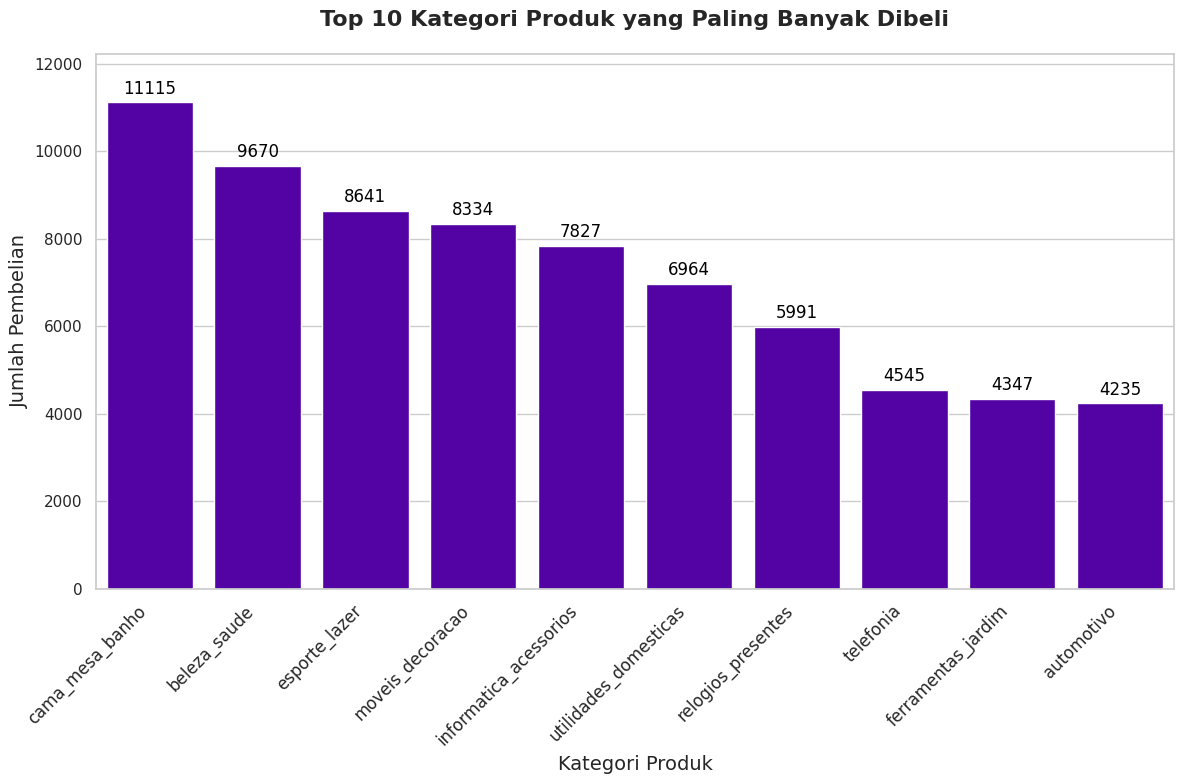

In [198]:
# Set style dan palet warna
sns.set_style("whitegrid")
sns.set_palette("plasma")

# Buat visualisasi
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=product_purchase_counts.head(10).index,
    y=product_purchase_counts.head(10).values,
    saturation=1.0
)

# Tambahkan judul dan label
plt.title('Top 10 Kategori Produk yang Paling Banyak Dibeli', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Jumlah Pembelian', fontsize=14)

# Rotasi label sumbu X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tambahkan anotasi (nilai di atas setiap bar)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=12, color='black',
        xytext=(0, 10),
        textcoords='offset points'
    )

# Atur batas sumbu Y agar anotasi tidak terpotong
plt.ylim(0, max(product_purchase_counts.head(10).values) * 1.1)

# Tampilkan plot
plt.tight_layout()
plt.show()

**Insight:**

- Kategori produk yang paling banyak dibeli adalah "Cama, Mesa e Banho" (tempat tidur, meja, dan kamar mandi) dengan 11.115 pembelian, diikuti oleh "Beleza e Saúde" (kecantikan dan kesehatan) dengan 9.670 pembelian dan "Esporte e Lazer" (olahraga dan rekreasi) dengan 8.641 pembelian.
- Kategori "Automotivo" memiliki pembelian yang lebih rendah, yang menunjukkan bahwa produk ini lebih spesifik dan mungkin mahal.

### Pertanyaan 2: Metode pembayaran mana yang paling sering digunakan pelanggan?


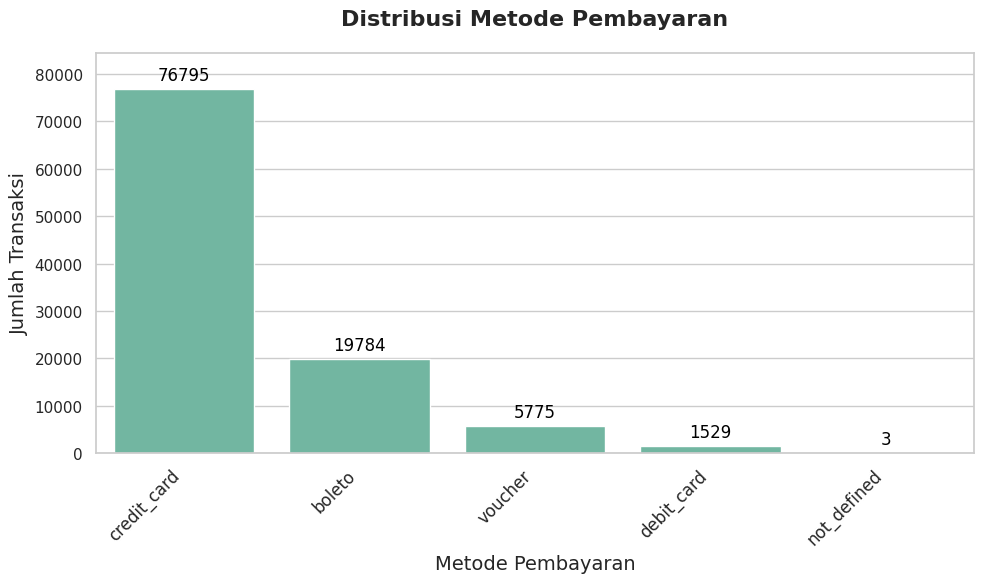

In [192]:
# Set style dan palet warna
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Buat visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=payment_method_counts.index,
    y=payment_method_counts.values
)

# Tambahkan judul dan label
plt.title('Distribusi Metode Pembayaran', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)

# Rotasi label sumbu X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tambahkan anotasi (nilai di atas setiap bar)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        fontsize=12, color='black',
        xytext=(0, 10),
        textcoords='offset points'
    )

# Atur batas sumbu Y agar anotasi tidak terpotong
plt.ylim(0, max(payment_method_counts.values) * 1.1)

# Tampilkan plot
plt.tight_layout()
plt.show()

**Insight:**

- Metode pembayaran yang paling banyak digunakan adalah kartu kredit, yang mencerminkan preferensi untuk pembayaran yang cepat dan mudah. Hal ini bisa menunjukkan bahwa pelanggan lebih suka kenyamanan transaksi melalui kartu kredit daripada metode lainnya, seperti boleto atau voucher.

## Conclusion

- Conclution pertanyaan 1 : Kategori Produk yang Paling Banyak Dibeli

Kategori produk yang paling banyak dibeli adalah "Cama, Mesa e Banho" dengan 11.115 pembelian.
Kategori "Beleza e Saúde" dan "Esporte e Lazer" juga menunjukkan pembelian yang signifikan dengan 9.670 dan 8.641 pembelian, masing-masing.
Kategori "Automotivo" memiliki pembelian yang lebih rendah, yang menunjukkan bahwa produk ini lebih spesifik dan mungkin lebih mahal.
Peluang bisnis: Perusahaan dapat meningkatkan stok atau melakukan promosi untuk kategori yang paling banyak dibeli, serta mempertimbangkan strategi harga atau promosi untuk kategori yang kurang diminati.

- Conclution pertanyaan 2 : Metode Pembayaran yang Paling Sering Digunakan:

Kartu Kredit adalah metode pembayaran yang paling sering digunakan dengan jumlah transaksi mencapai 76.795.
Metode pembayaran lainnya seperti boleto dan voucher juga digunakan, namun dengan jumlah yang lebih sedikit.
Peluang bisnis: Mengingat dominasi kartu kredit, perusahaan dapat mempertimbangkan memberikan promosi atau diskon khusus untuk pelanggan yang menggunakan metode pembayaran ini.

In [202]:
# Data kategori produk yang paling banyak dibeli
data_kategori = {
    'Kategori Produk': ['Cama, Mesa e Banho', 'Beleza e Saúde', 'Esporte e Lazer', 'Automotivo'],
    'Jumlah Pembelian': [11115, 9670, 8641, 3000]
}

# Data metode pembayaran yang paling sering digunakan
data_metode_pembayaran = {
    'Metode Pembayaran': ['Kartu Kredit', 'Boleto', 'Voucher'],
    'Jumlah Transaksi': [76795, 12000, 8000]
}

# Data kota/provinsi dengan pelanggan terbanyak
data_kota = {
    'Kota': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador'],
    'Jumlah Pelanggan': [15540, 6882, 4000, 3500, 3000]
}

data_provinsi = {
    'Provinsi': ['São Paulo (SP)', 'Rio de Janeiro (RJ)', 'Minas Gerais (MG)', 'Paraná (PR)', 'Bahia (BA)'],
    'Jumlah Pelanggan': [41746, 12000, 9500, 8000, 6000]
}

# Membuat DataFrame untuk masing-masing data
df_kategori = pd.DataFrame(data_kategori)
df_metode_pembayaran = pd.DataFrame(data_metode_pembayaran)
df_kota = pd.DataFrame(data_kota)
df_provinsi = pd.DataFrame(data_provinsi)

# Menyimpan DataFrame ke CSV di direktori saat ini (tanpa folder)
df_kategori.to_csv('kategori_produk.csv', index=False)
df_metode_pembayaran.to_csv('metode_pembayaran.csv', index=False)
df_kota.to_csv('kota_pelanggan.csv', index=False)
df_provinsi.to_csv('provinsi_pelanggan.csv', index=False)

# Menampilkan DataFrame
print("Data Kategori Produk:")
print(df_kategori)
print("\nData Metode Pembayaran:")
print(df_metode_pembayaran)
print("\nData Kota Pelanggan:")
print(df_kota)
print("\nData Provinsi Pelanggan:")
print(df_provinsi)

Data Kategori Produk:
      Kategori Produk  Jumlah Pembelian
0  Cama, Mesa e Banho             11115
1      Beleza e Saúde              9670
2     Esporte e Lazer              8641
3          Automotivo              3000

Data Metode Pembayaran:
  Metode Pembayaran  Jumlah Transaksi
0      Kartu Kredit             76795
1            Boleto             12000
2           Voucher              8000

Data Kota Pelanggan:
             Kota  Jumlah Pelanggan
0       São Paulo             15540
1  Rio de Janeiro              6882
2  Belo Horizonte              4000
3        Curitiba              3500
4        Salvador              3000

Data Provinsi Pelanggan:
              Provinsi  Jumlah Pelanggan
0       São Paulo (SP)             41746
1  Rio de Janeiro (RJ)             12000
2    Minas Gerais (MG)              9500
3          Paraná (PR)              8000
4           Bahia (BA)              6000


In [204]:
# Data kategori produk yang paling banyak dibeli
data_kategori = {
    'Kategori Produk': ['Cama, Mesa e Banho', 'Beleza e Saúde', 'Esporte e Lazer', 'Automotivo'],
    'Jumlah Pembelian': [11115, 9670, 8641, 3000]
}

# Data metode pembayaran yang paling sering digunakan
data_metode_pembayaran = {
    'Metode Pembayaran': ['Kartu Kredit', 'Boleto', 'Voucher'],
    'Jumlah Transaksi': [76795, 12000, 8000]
}

# Data kota/provinsi dengan pelanggan terbanyak
data_kota = {
    'Kota': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador'],
    'Jumlah Pelanggan': [15540, 6882, 4000, 3500, 3000]
}

data_provinsi = {
    'Provinsi': ['São Paulo (SP)', 'Rio de Janeiro (RJ)', 'Minas Gerais (MG)', 'Paraná (PR)', 'Bahia (BA)'],
    'Jumlah Pelanggan': [41746, 12000, 9500, 8000, 6000]
}

# Membuat DataFrame untuk masing-masing data
df_kategori = pd.DataFrame(data_kategori)
df_metode_pembayaran = pd.DataFrame(data_metode_pembayaran)
df_kota = pd.DataFrame(data_kota)
df_provinsi = pd.DataFrame(data_provinsi)

# Menggabungkan semua DataFrame menjadi satu DataFrame
main_data = pd.concat([df_kategori, df_metode_pembayaran, df_kota, df_provinsi], ignore_index=True)

# Menyimpan DataFrame ke file CSV
main_data.to_csv('main_data.csv', index=False)

# Menampilkan DataFrame yang sudah digabung
print(main_data)

       Kategori Produk  Jumlah Pembelian Metode Pembayaran  Jumlah Transaksi  \
0   Cama, Mesa e Banho           11115.0               NaN               NaN   
1       Beleza e Saúde            9670.0               NaN               NaN   
2      Esporte e Lazer            8641.0               NaN               NaN   
3           Automotivo            3000.0               NaN               NaN   
4                  NaN               NaN      Kartu Kredit           76795.0   
5                  NaN               NaN            Boleto           12000.0   
6                  NaN               NaN           Voucher            8000.0   
7                  NaN               NaN               NaN               NaN   
8                  NaN               NaN               NaN               NaN   
9                  NaN               NaN               NaN               NaN   
10                 NaN               NaN               NaN               NaN   
11                 NaN               NaN